In [22]:
%matplotlib inline
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import normalize, LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression  
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report  
from sklearn.metrics import confusion_matrix
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc

In [23]:
data_url = 'Data2.csv'
df = pd.read_csv(data_url)

In [24]:
def model_eval(actual, predicted):
  acc_score = accuracy_score(actual, predicted)
  conf_matrix = confusion_matrix(actual, predicted)
  clas_rep = classification_report(actual, predicted)
  print('Model Accuracy is: ', round(acc_score, 2))
  print(conf_matrix)
  print(clas_rep)

In [25]:
y = df['Class']
X = df.iloc[:, df.columns != 'Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Random Forest

In [26]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
preds_rf_test = rf.predict(X_test)
model_eval(y_test, preds_rf_test)

Model Accuracy is:  1.0
[[42339    14]
 [    0 22989]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     42353
           1       1.00      1.00      1.00     22989

    accuracy                           1.00     65342
   macro avg       1.00      1.00      1.00     65342
weighted avg       1.00      1.00      1.00     65342



In [27]:
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, preds_rf_test)
rf_roc_auc = auc(rf_fpr, rf_tpr)
print("AUC Score:", rf_roc_auc)

AUC Score: 0.9998347224517743


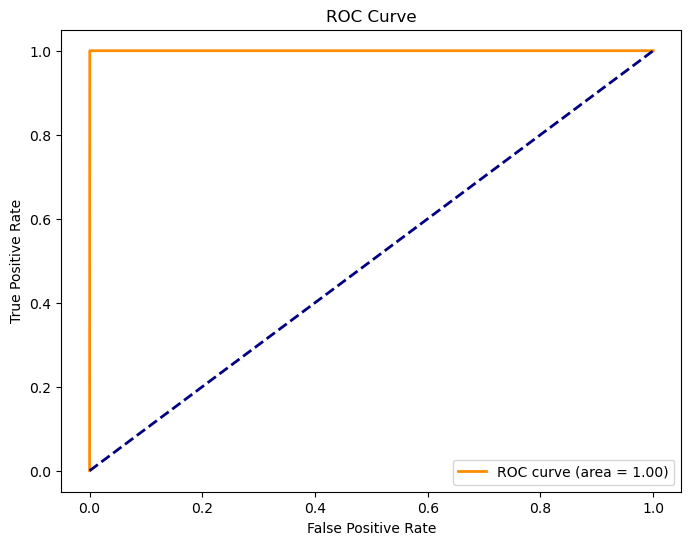

In [28]:
plt.figure(figsize=(8, 6))
plt.plot(rf_fpr, rf_tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

## Neural Network

In [29]:
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')  
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=15, batch_size=32, validation_split=0.2)

test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_accuracy)

Epoch 1/15


C:\Users\lequa\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6535/6535 ━━━━━━━━━━━━━━━━━━━━ 6s 856us/step - accuracy: 0.7263 - loss: 7.5439 - val_accuracy: 0.9235 - val_loss: 0.8551
Epoch 2/15
6535/6535 ━━━━━━━━━━━━━━━━━━━━ 6s 848us/step - accuracy: 0.8836 - loss: 1.6417 - val_accuracy: 0.9390 - val_loss: 0.3432
Epoch 3/15
6535/6535 ━━━━━━━━━━━━━━━━━━━━ 5s 824us/step - accuracy: 0.9002 - loss: 1.0994 - val_accuracy: 0.9281 - val_loss: 0.6155
Epoch 4/15
6535/6535 ━━━━━━━━━━━━━━━━━━━━ 6s 909us/step - accuracy: 0.9096 - loss: 0.6724 - val_accuracy: 0.9382 - val_loss: 0.2864
Epoch 5/15
6535/6535 ━━━━━━━━━━━━━━━━━━━━ 6s 909us/step - accuracy: 0.9180 - loss: 0.3724 - val_accuracy: 0.9375 - val_loss: 0.2352
Epoch 6/15
6535/6535 ━━━━━━━━━━━━━━━━━━━━ 6s 874us/step - accuracy: 0.9244 - loss: 0.2714 - val_accuracy: 0.9166 - val_loss: 0.3085
Epoch 7/15
6535/6535 ━━━━━━━━━━━━━━━━━━━━ 6s 858us/step - accuracy: 0.9300 - loss: 0.2015 - val_accuracy: 0.9416 - val_loss: 0.1707
Epoch 8/15
6535/6535 ━━━━━━━━━━━━━━━━━━━━ 6s 911us/step - accuracy: 0.9340 - loss: 0.18

In [30]:
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int) 
model_eval(y_test, y_pred)

2042/2042 ━━━━━━━━━━━━━━━━━━━━ 1s 617us/step
Model Accuracy is:  0.94
[[41188  1165]
 [ 2552 20437]]
              precision    recall  f1-score   support

           0       0.94      0.97      0.96     42353
           1       0.95      0.89      0.92     22989

    accuracy                           0.94     65342
   macro avg       0.94      0.93      0.94     65342
weighted avg       0.94      0.94      0.94     65342



In [31]:
nn_fpr, nn_tpr, nn_thresholds = roc_curve(y_test, y_pred_prob)
nn_roc_auc = auc(nn_fpr, nn_tpr)
print("AUC Score:", nn_roc_auc)

AUC Score: 0.9797739008316655


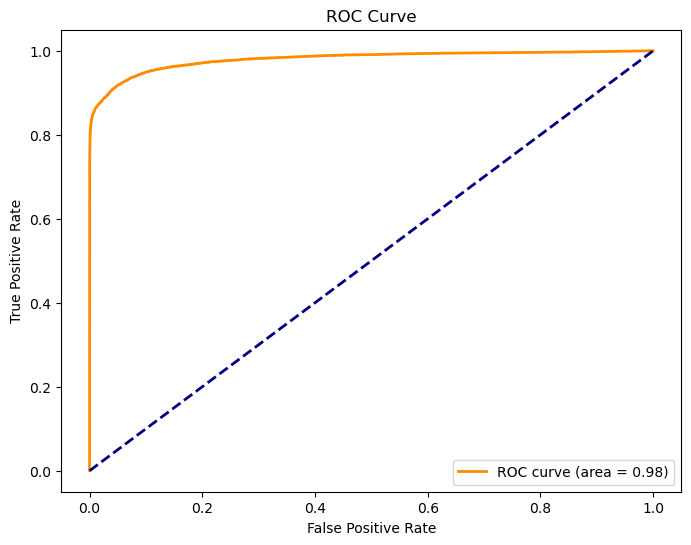

In [32]:
plt.figure(figsize=(8, 6))
plt.plot(nn_fpr, nn_tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % nn_roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()